In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

KNN: K-Nearest Neighbors

In [5]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [4]:
df.head()

,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popular
0,3,0.685,0.644,10,-13.206,0,0.1550,0.302,0.000055,0.1140,0.808,164.919,169379,4,0
1,3,0.752,0.620,5,-5.536,1,0.0509,0.309,0.000000,0.0750,0.962,117.399,164459,4,0
2,1,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
3,2,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
4,3,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0


In [6]:
#Split the data into features and target variable
X = df.drop(columns=['popular'], axis=1)  # Features
y = df['popular']  # Target variable

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Train a KNN classifier (Choosing K=5 as a default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Make predictions
y_pred = knn.predict(X_test)

In [10]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8392529983218635

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     55340
           1       0.39      0.16      0.22      9613

    accuracy                           0.84     64953
   macro avg       0.63      0.56      0.57     64953
weighted avg       0.80      0.84      0.81     64953



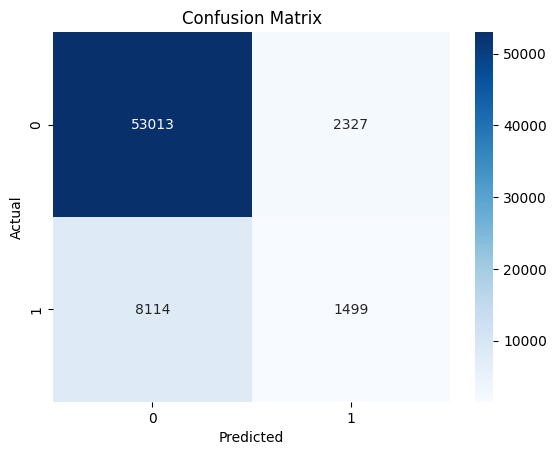

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score


In [13]:
# Cross-validation (to check model consistency)
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation accuracy scores: [0.82762921 0.82527366 0.8290918  0.82644374 0.8280295 ]
Mean cross-validation accuracy: 0.8273


In [16]:
from sklearn.metrics import roc_curve, auc


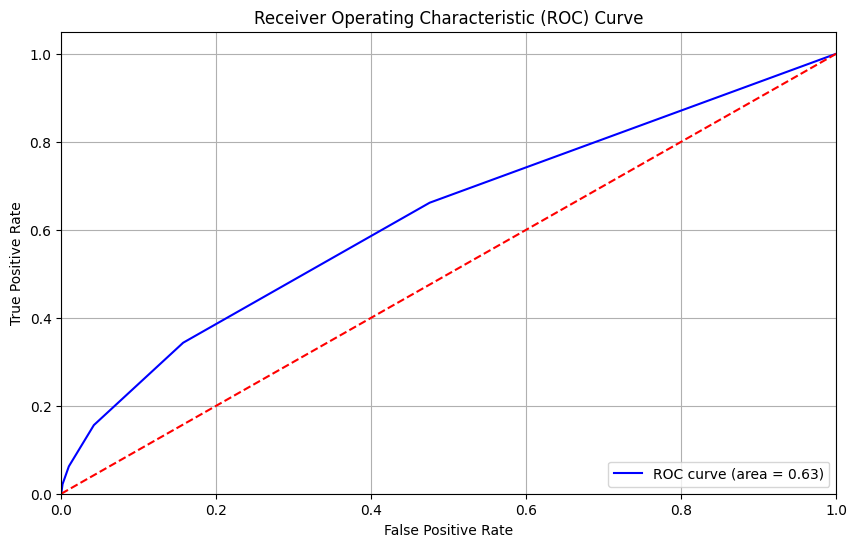

In [15]:
# Predict probabilities
y_scores = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Let's address class imbalance

Oversampling with SMOTE

In [2]:
from imblearn.over_sampling import SMOTE


In [9]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_scaled, y)



In [10]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [11]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
# Make predictions
y_pred = knn.predict(X_test)


In [13]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8073625273863299

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.64      0.77     55470
           1       0.73      0.97      0.83     55443

    accuracy                           0.81    110913
   macro avg       0.84      0.81      0.80    110913
weighted avg       0.84      0.81      0.80    110913



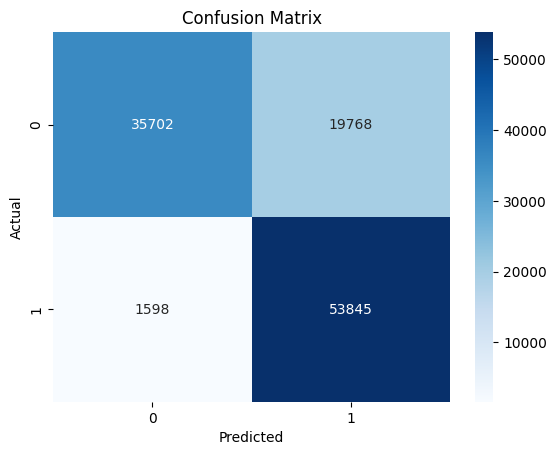

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Better for predicting popular song, worse for non-popular, but still quite well-balanced.

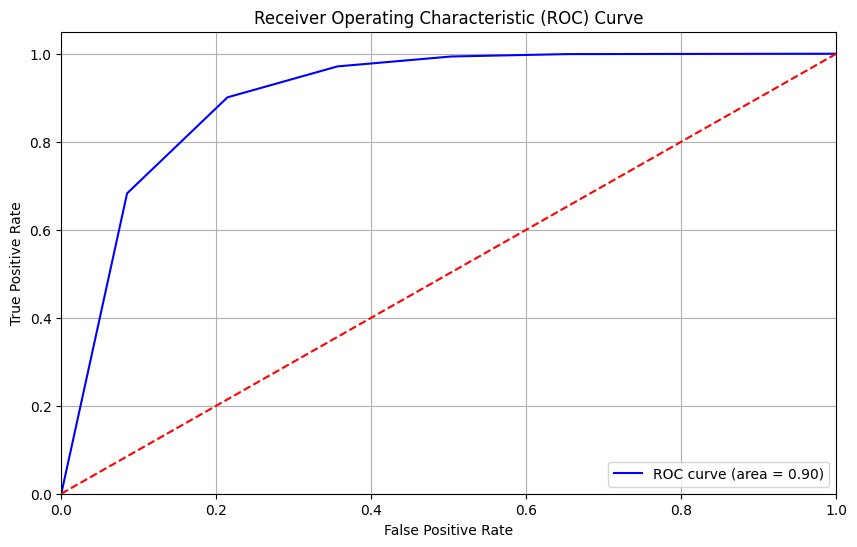

In [17]:
# ROC curve
y_scores = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC curve is better with oversampling.

Let's also try undersampling

In [18]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler


In [19]:
# Apply random under-sampling
rus = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus = rus.fit_resample(X_scaled, y)


In [20]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)


In [21]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# Make predictions
y_pred = knn.predict(X_test)


In [23]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5700221122459724

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.56      9544
           1       0.56      0.59      0.58      9450

    accuracy                           0.57     18994
   macro avg       0.57      0.57      0.57     18994
weighted avg       0.57      0.57      0.57     18994



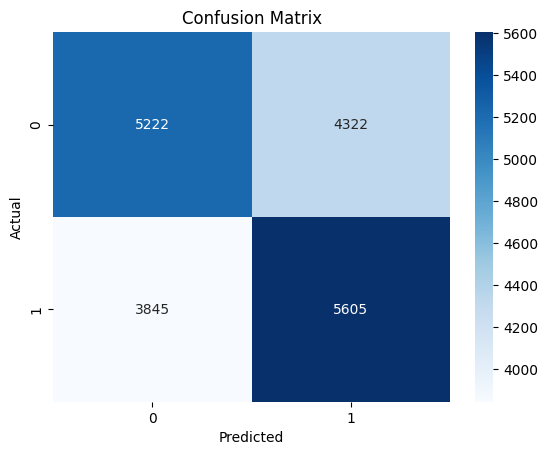

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

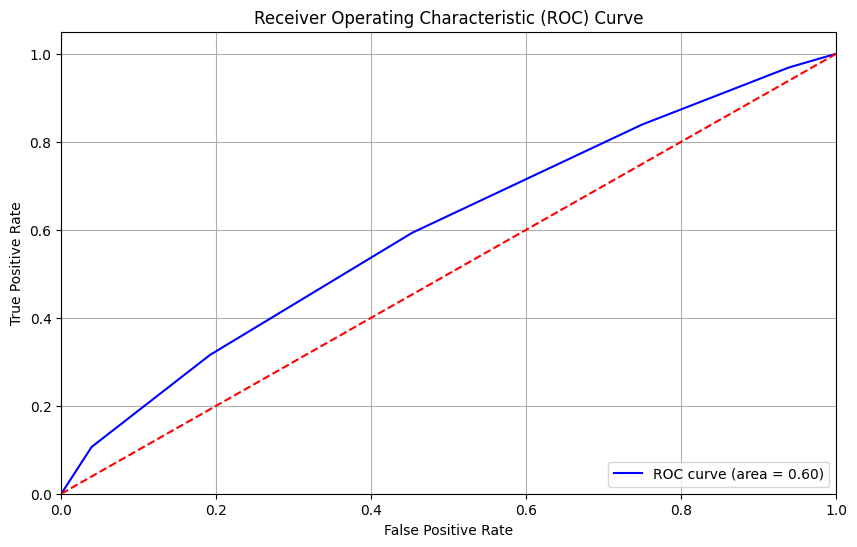

In [25]:
# ROC curve
y_scores = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Oversampling is better.

In [17]:
#Predict song popularity based on region and features
def predict_song_popularity(region_code, features, model, scaler):
    # Include region in the feature list
    features_with_region = [region_code] + features 
    
    # Create a DataFrame for the input features
    input_data = pd.DataFrame([features_with_region], columns=list(X.columns))
    
    # Scale the features using the previously fitted scaler
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_scaled)
    
    if prediction[0] == 1:
        return "The song is predicted to be popular."
    else:
        return "The song is predicted to not be popular."

# Example usage:
new_song_features = [
    0.9,   # danceability
    0.702,   # energy
    9,     # key
    -5.707,  # loudness
    1,     # mode
    0.13,  # speechiness
    0.117,   # acousticness
    0.0000206,   # instrumentalness
    0.105,   # liveness
    0.564,   # valence
    169.994,   # tempo
    206987.98,  # duration_ms
    4      # time_signature
]

new_song_features_2 = [
   0.591,0.903,2,-4.102,1,0.0312,0.000607,0.0,0.183,0.512,103.992,273307,4
]



# Example prediction for East Asia
region_code = 1
result = predict_song_popularity(region_code, new_song_features_2, knn, scaler)
print(result)

The song is predicted to be popular.
